In [16]:
import random
import math

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.tree import DecisionTreeClassifier

# Step 1:


 
**Which dataset did you select?**
 
We chose the Student Performance Data Set (Kaggle Description: This data approach student achievement in secondary education of two Portuguese schools) from 
 
https://www.kaggle.com/larsen0966/student-performance-data-set?select=student-por.csv
 
**Which regulated domain does your dataset belong to?**
 
The dataset belongs to the Education domain. 
 
**How many observations are in the dataset?**
 
There are 649 observations.
 
**How many variables in the dataset?**
 
There are 33 variables in the dataset.
 
**Which variables did you select as your dependent variables?**
 
We selected the grades related to Portuguese:
G1 - first-period grade (numeric: from 0 to 20)
G2 - second-period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)
 
**How many and which variables in the dataset are associated with a legally recognized protected class?**
 
There are two variables associated with legally recognized protected classes: age and sex. 
 

**Which legal precedence/law (as discussed in the lectures) does each protected class fall under?**
 
Age: Age Discrimination in Employment Act of 1967
Sex: Equal Pay Act of 1963; Civil Rights Act of 1964, 1991


In [17]:

def STEP1():
    df = pd.read_csv('dataset/student-por.csv', delimiter=',')
    print(df.head(5))
    print("Number of records port: ", len(df))
    r, c = df.shape
    print("rows port: ", r)
    print("columns port: ", c)
    print()
    for col in df.columns:
        print(col)
STEP1()

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
Number of records port:  649
rows port:  649
columns port:  33

school
sex
age
address
f

# Step 2:


### 2.1:

| Protected Class | Variable | Raw Values                     | Subsets         |
|-----------------|----------|--------------------------------|-----------------|
| Gender          | sex      | F, M                           | Female, Male    |
| Age             | age      | 15, 16, 17, 18, 19, 20, 21, 22 | [15-17] [18-22] |


### 2.2:

Min Grade = 0<br>
Avg Grade = 11<br>
Max Grade = 19<br>
 
bins = [0, 11, 19]<br>
labels = [0, 1]<br>
 
df['G1'] = pd.cut(df.G1, bins=bins, labels=labels, include_lowest=True) <br>
df['G2'] = pd.cut(df.G2, bins=bins, labels=labels, include_lowest=True) <br>
df['G3'] = pd.cut(df.G3, bins=bins, labels=labels, include_lowest=True) <br>
 
<br>

| Dependent Variables | Raw Categories                                              | Discrete Categories                              |
|---------------------|-------------------------------------------------------------|--------------------------------------------------|
| G1                  | 0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 | [0-11] represented as 0 [12-19] represented as 1 |
| G2                  | 0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19    | [0-11] represented as 0 [12-19] represented as 1 |
| G3                  | 0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 | [0-11] represented as 0 [12-19] represented as 1 |



<br><br>

| Age   | Bin | G1  | G2  | G3  |
|-------|-----|-----|-----|-----|
| 15-17 | 0   | 227 | 225 | 205 |
| 15-17 | 1   | 241 | 243 | 263 |
| 18-22 | 0   | 116 | 106 | 96  |
| 18-22 | 1   | 65  | 75  | 85  |


<br><br>

| Age   | Bin | G1  | G2  | G3  |
|-------|-----|-----|-----|-----|
| 15-17 | 0   | 227 | 225 | 205 |
| 15-17 | 1   | 241 | 243 | 263 |
| 18-22 | 0   | 116 | 106 | 96  |
| 18-22 | 1   | 65  | 75  | 85  |


### 2.3:

| Age Group | Gender | Total |
|-----------|--------|-------|
| 15-17     | Female | 275   |
| 15-17     | Male   | 193   |
| 18-22     | Female | 108   |
| 18-22     | Male   | 73    |



Age:  [15, 16, 17, 18, 19, 20, 21, 22]
G1:  [0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
G2:  [0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
G3:  [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
G1 Max:  19
G1 Min:  0
G1 Avg:  11.399075500770415
G2 Max:  19
G2 Min:  0
G2 Avg:  11.570107858243452
G3 Max:  19
G3 Min:  0
G3 Avg:  11.906009244992296


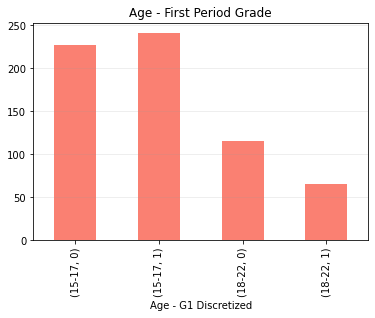

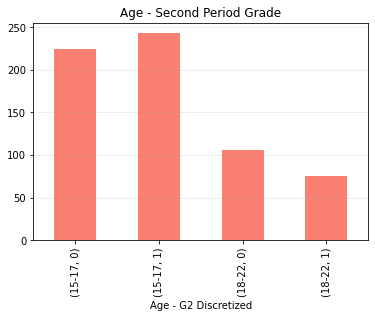

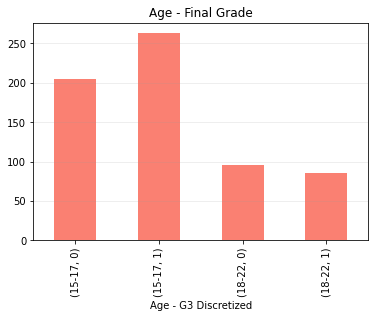

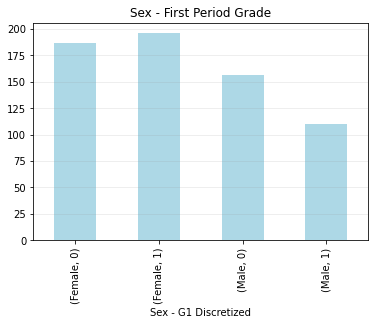

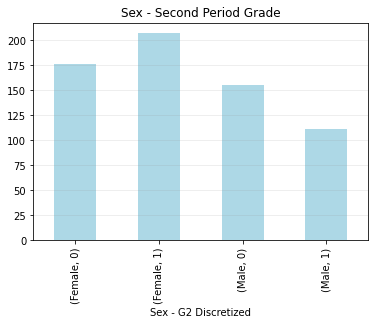

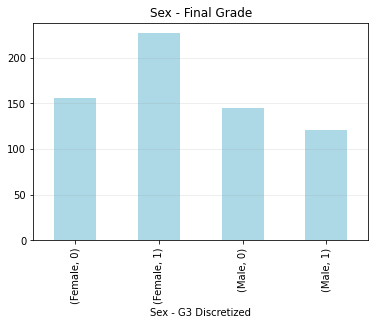

In [18]:

def STEP2():
    df = pd.read_csv('dataset/student-por.csv', delimiter=',')

    df.loc[df['sex'] == "M", ['sex']] = 'Male'
    df.loc[df['sex'] == "F", ['sex']] = 'Female'

    df.loc[df['age'].between(15, 17, inclusive=True), ['age_group']] = '15-17'
    df.loc[df['age'].between(18, 22, inclusive=True), ['age_group']] = '18-22'

    age_group_sex_freq = df.groupby(['age_group', 'sex']).size()
    age_group_sex_freq.to_csv('out/age_group_sex_freq.csv')

    age_unique = []
    g1_unique = []
    g2_unique = []
    g3_unique = []

    for x in df['age']:
        if x not in age_unique:
            age_unique.append(x)

    for x in df['G1']:
        if x not in g1_unique:
            g1_unique.append(x)

    for x in df['G2']:
        if x not in g2_unique:
            g2_unique.append(x)

    for x in df['G3']:
        if x not in g3_unique:
            g3_unique.append(x)

    age_unique.sort()
    g1_unique.sort()
    g2_unique.sort()
    g3_unique.sort()

    print("Age: ", age_unique)
    print("G1: ", g1_unique)
    print("G2: ", g2_unique)
    print("G3: ", g3_unique)

    print("G1 Max: ", df['G1'].max())
    print("G1 Min: ", df['G1'].min())
    print("G1 Avg: ", df['G1'].mean())

    print("G2 Max: ", df['G2'].max())
    print("G2 Min: ", df['G2'].min())
    print("G2 Avg: ", df['G2'].mean())

    print("G3 Max: ", df['G3'].max())
    print("G3 Min: ", df['G3'].min())
    print("G3 Avg: ", df['G3'].mean())

    bins = [0, 11, 19]
    labels = [0, 1]

    df['G1'] = pd.cut(df.G1, bins=bins, labels=labels, include_lowest=True)
    df['G2'] = pd.cut(df.G2, bins=bins, labels=labels, include_lowest=True)
    df['G3'] = pd.cut(df.G3, bins=bins, labels=labels, include_lowest=True)

    age_g1_freq = df.groupby(['age_group', 'G1']).size()
    age_g1_freq.to_csv('out/age_g1_freq.csv')

    age_g2_freq = df.groupby(['age_group', 'G2']).size()
    age_g2_freq.to_csv('out/age_g2_freq.csv')

    age_g3_freq = df.groupby(['age_group', 'G3']).size()
    age_g3_freq.to_csv('out/age_g3_freq.csv')

    sex_g1_freq = df.groupby(['sex', 'G1']).size()
    sex_g1_freq.to_csv('out/sex_g1_freq.csv')

    sex_g2_freq = df.groupby(['sex', 'G2']).size()
    sex_g2_freq.to_csv('out/sex_g2_freq.csv')

    sex_g3_freq = df.groupby(['sex', 'G3']).size()
    sex_g3_freq.to_csv('out/sex_g3_freq.csv')

    age_g1_freq.plot.bar(stacked=False, color="salmon")
    plt.title('Age - First Period Grade')
    plt.grid(True, axis='y', alpha=0.2, color='#999999')
    plt.xlabel('Age - G1 Discretized')
    plt.savefig('out/age_g1_freq.png', bbox_inches='tight')
    plt.show()

    age_g2_freq.plot.bar(stacked=False, color="salmon")
    plt.title('Age - Second Period Grade')
    plt.grid(True, axis='y', alpha=0.2, color='#999999')
    plt.xlabel('Age - G2 Discretized')
    plt.savefig('out/age_g2_freq.png', bbox_inches='tight')
    plt.show()

    age_g3_freq.plot.bar(stacked=False, color="salmon")
    plt.title('Age - Final Grade')
    plt.grid(True, axis='y', alpha=0.2, color='#999999')
    plt.xlabel('Age - G3 Discretized')
    plt.savefig('out/age_g3_freq.png', bbox_inches='tight')
    plt.show()

    sex_g1_freq.plot.bar(stacked=False, color="lightblue")
    plt.title('Sex - First Period Grade')
    plt.grid(True, axis='y', alpha=0.2, color='#999999')
    plt.xlabel('Sex - G1 Discretized')
    plt.savefig('out/sex_g1_freq.png', bbox_inches='tight')
    plt.show()

    sex_g2_freq.plot.bar(stacked=False, color="lightblue")
    plt.title('Sex - Second Period Grade')
    plt.grid(True, axis='y', alpha=0.2, color='#999999')
    plt.xlabel('Sex - G2 Discretized')
    plt.savefig('out/sex_g2_freq.png', bbox_inches='tight')
    plt.show()

    sex_g3_freq.plot.bar(stacked=False, color="lightblue")
    plt.title('Sex - Final Grade')
    plt.grid(True, axis='y', alpha=0.2, color='#999999')
    plt.xlabel('Sex - G3 Discretized')
    plt.savefig('out/sex_g3_freq.png', bbox_inches='tight')
    plt.show()

STEP2()

# Step 3:

| Protected Class | Variable | Privileged Group | Unprivileged Group |
|-----------------|----------|------------------|--------------------|
| Gender          | sex      | Female           | Male               |
| Age             | age      | [15-17]          | [18-22]            |


<br>
The fairness metrics selected are:
1. Statistical Parity Difference
2. Disparate Impact
The threshold chosen to calculate the fairness metric is the grade value of 12 (maximum grade value is 19).

Fairness Metrics Calculated:

| Dependent Variable | Protected Class Variable | Statistical Parity Difference | Disparate Impact |
|--------------------|--------------------------|-------------------------------|------------------|
| G1                 | sex                      | -0.0982155                    | 0.8080788        |
| G1                 | age                      | -0.1558412                    | 0.6973705        |
| G2                 | sex                      | -0.1231767                    | 0.7720932        |
| G2                 | age                      | -0.1048661                    | 0.7980356        |
| G3                 | sex                      | -0.1378020                    | 0.7674969        |
| G3                 | age                      | -0.0923525                    | 0.8356616        |




Bias Mitigation Strategy selected: **Reweighting.**
<br>
The weights were calculated for each Dependent Variable and Protected Class Variable Combination, and used these weights to calculate the new fairness metrics. (Different weights were used for each row, actual weight values can be found in the out folder after running the application).
<br>


Fairness Metrics Calculated after Reweighting:

| Dependent Variable | Protected Class Variable | Statistical Parity Difference | Disparate Impact   |
|--------------------|--------------------------|-------------------------------|--------------------|
| G1                 | sex                      | 0                             | 1.0000000000000002 |
| G1                 | age                      | 0                             | 1.0000000000000002 |
| G2                 | sex                      | 0                             | 1                  |
| G2                 | age                      | 0                             | 1                  |
| G3                 | sex                      | 0                             | 1                  |
| G3                 | age                      | 0                             | 1.0000000000000002 |




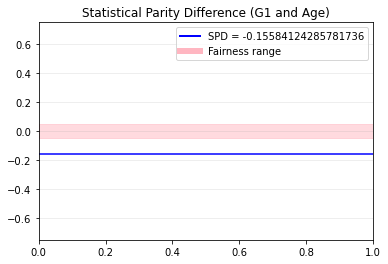

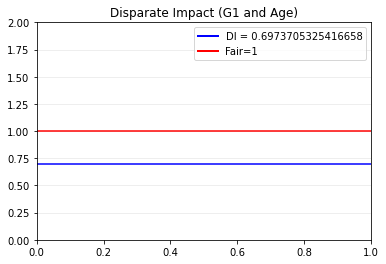

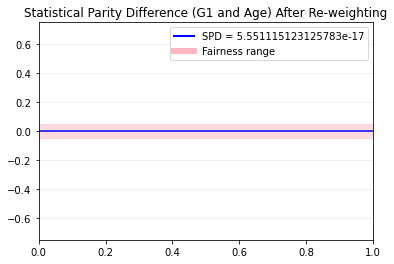

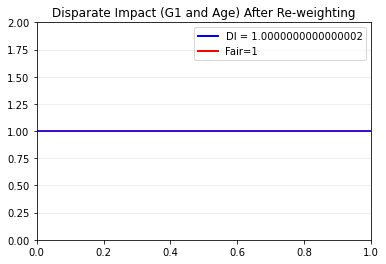

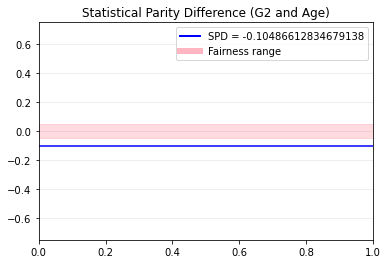

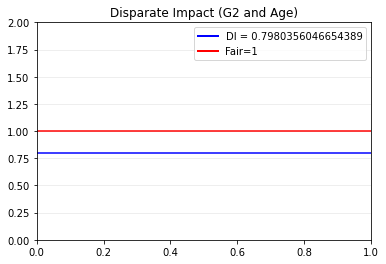

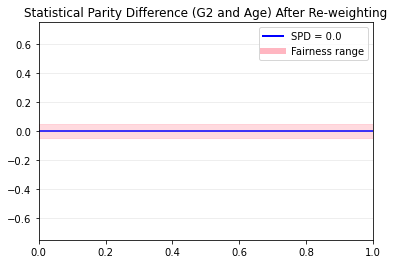

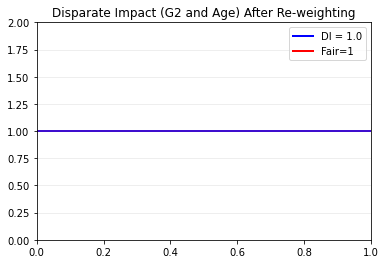

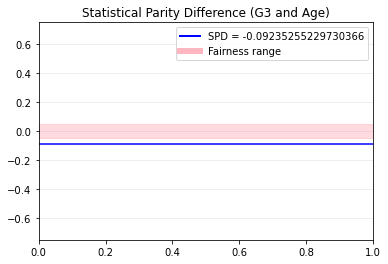

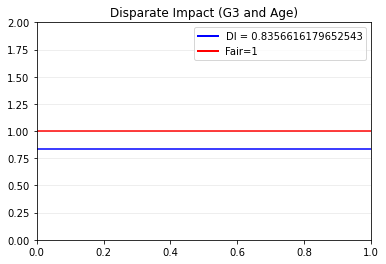

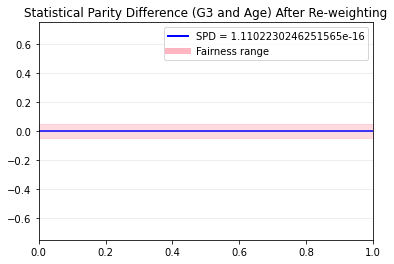

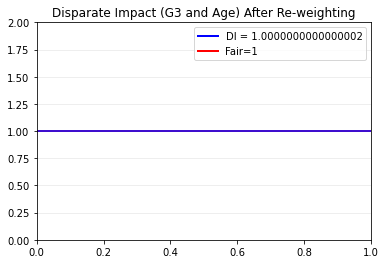

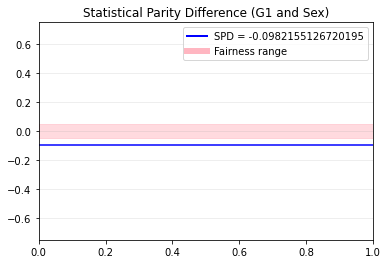

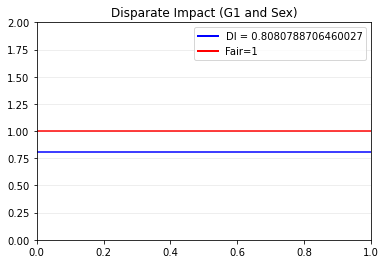

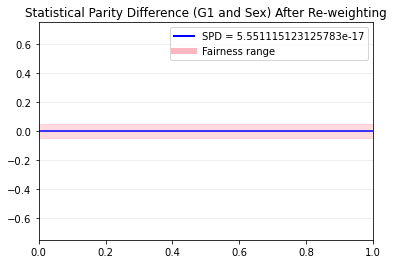

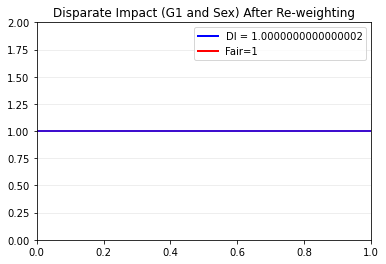

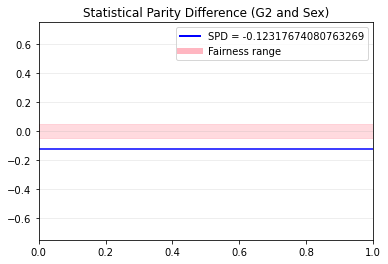

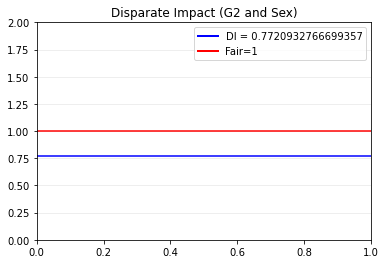

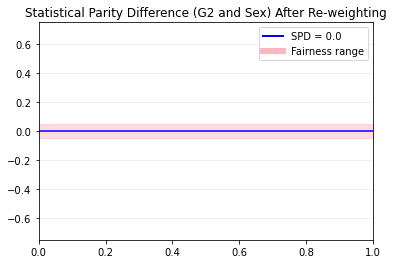

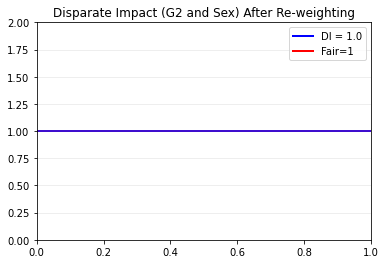

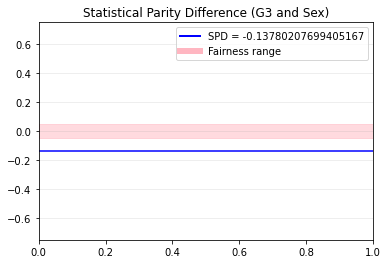

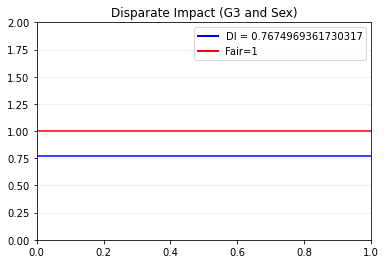

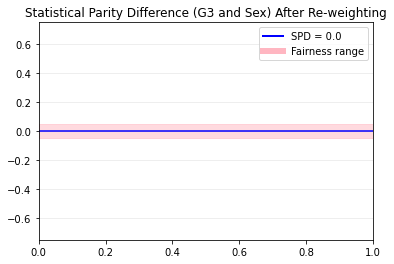

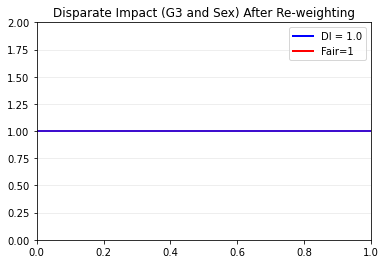

In [19]:

def STEP3():
    df = pd.read_csv('dataset/student-por.csv', delimiter=',')

    df.loc[df['sex'] == "M", ['sex']] = 'Male'
    df.loc[df['sex'] == "F", ['sex']] = 'Female'

    df.loc[df['age'].between(15, 17, inclusive=True), ['age_group']] = '15-17'
    df.loc[df['age'].between(18, 22, inclusive=True), ['age_group']] = '18-22'

    bins = [0, 11, 19]
    labels = [0, 1]

    df['G1'] = pd.cut(df.G1, bins=bins, labels=labels, include_lowest=True)
    df['G2'] = pd.cut(df.G2, bins=bins, labels=labels, include_lowest=True)
    df['G3'] = pd.cut(df.G3, bins=bins, labels=labels, include_lowest=True)

    age_g1_freq = df.groupby(['age_group', 'G1']).size()
    age_g2_freq = df.groupby(['age_group', 'G2']).size()
    age_g3_freq = df.groupby(['age_group', 'G3']).size()
    sex_g1_freq = df.groupby(['sex', 'G1']).size()
    sex_g2_freq = df.groupby(['sex', 'G2']).size()
    sex_g3_freq = df.groupby(['sex', 'G3']).size()

    up_sex = 'Male'
    up_age = '18-22'
    p_sex = 'Female'
    p_age = '15-17'

    # statistical parity difference G1 and age
    spd_g1_age = (age_g1_freq[up_age][1] / (age_g1_freq[up_age][1] + age_g1_freq[up_age][0])) - (
            age_g1_freq[p_age][1] / (age_g1_freq[p_age][1] + age_g1_freq[p_age][0]))

    # statistical parity difference G2 and age
    spd_g2_age = (age_g2_freq[up_age][1] / (age_g2_freq[up_age][1] + age_g2_freq[up_age][0])) - (
            age_g2_freq[p_age][1] / (age_g2_freq[p_age][1] + age_g2_freq[p_age][0]))

    # statistical parity difference G3 and age
    spd_g3_age = (age_g3_freq[up_age][1] / (age_g3_freq[up_age][1] + age_g3_freq[up_age][0])) - (
            age_g3_freq[p_age][1] / (age_g3_freq[p_age][1] + age_g3_freq[p_age][0]))

    # statistical parity difference G1 and sex
    spd_g1_sex = (sex_g1_freq[up_sex][1] / (sex_g1_freq[up_sex][1] + sex_g1_freq[up_sex][0])) - (
            sex_g1_freq[p_sex][1] / (sex_g1_freq[p_sex][1] + sex_g1_freq[p_sex][0]))

    # statistical parity difference G1 and sex
    spd_g2_sex = (sex_g2_freq[up_sex][1] / (sex_g2_freq[up_sex][1] + sex_g2_freq[up_sex][0])) - (
            sex_g2_freq[p_sex][1] / (sex_g2_freq[p_sex][1] + sex_g2_freq[p_sex][0]))

    # statistical parity difference G1 and sex
    spd_g3_sex = (sex_g3_freq[up_sex][1] / (sex_g3_freq[up_sex][1] + sex_g3_freq[up_sex][0])) - (
            sex_g3_freq[p_sex][1] / (sex_g3_freq[p_sex][1] + sex_g3_freq[p_sex][0]))

    spd_data = [['G1', 'Age', spd_g1_age], ['G2', 'Age', spd_g2_age], ['G3', 'Age', spd_g3_age],
                ['G1', 'Sex', spd_g1_sex], ['G2', 'Sex', spd_g2_sex], ['G3', 'Sex', spd_g3_sex]]

    pd.DataFrame(spd_data,
                 columns=['Dependent Variable', 'Protected Class Variable', 'Statistical Parity Difference']).to_csv(
        'out/spd.csv', index=False)

    # disparate impact G1 and age
    di_g1_age = (age_g1_freq[up_age][1] / (age_g1_freq[up_age][1] + age_g1_freq[up_age][0])) / (
            age_g1_freq[p_age][1] / (age_g1_freq[p_age][1] + age_g1_freq[p_age][0]))

    # disparate impact G2 and age
    di_g2_age = (age_g2_freq[up_age][1] / (age_g2_freq[up_age][1] + age_g2_freq[up_age][0])) / (
            age_g2_freq[p_age][1] / (age_g2_freq[p_age][1] + age_g2_freq[p_age][0]))

    # disparate impact G3 and age
    di_g3_age = (age_g3_freq[up_age][1] / (age_g3_freq[up_age][1] + age_g3_freq[up_age][0])) / (
            age_g3_freq[p_age][1] / (age_g3_freq[p_age][1] + age_g3_freq[p_age][0]))

    # disparate impact G1 and sex
    di_g1_sex = (sex_g1_freq[up_sex][1] / (sex_g1_freq[up_sex][1] + sex_g1_freq[up_sex][0])) / (
            sex_g1_freq[p_sex][1] / (sex_g1_freq[p_sex][1] + sex_g1_freq[p_sex][0]))

    # disparate impact G2 and sex
    di_g2_sex = (sex_g2_freq[up_sex][1] / (sex_g2_freq[up_sex][1] + sex_g2_freq[up_sex][0])) / (
            sex_g2_freq[p_sex][1] / (sex_g2_freq[p_sex][1] + sex_g2_freq[p_sex][0]))

    # disparate impact G3 and sex
    di_g3_sex = (sex_g3_freq[up_sex][1] / (sex_g3_freq[up_sex][1] + sex_g3_freq[up_sex][0])) / (
            sex_g3_freq[p_sex][1] / (sex_g3_freq[p_sex][1] + sex_g3_freq[p_sex][0]))

    di_data = [['G1', 'Age', di_g1_age], ['G2', 'Age', di_g2_age], ['G3', 'Age', di_g3_age],
               ['G1', 'Sex', di_g1_sex], ['G2', 'Sex', di_g2_sex], ['G3', 'Sex', di_g3_sex]]

    pd.DataFrame(di_data,
                 columns=['Dependent Variable', 'Protected Class Variable', 'Disparate Impact']).to_csv(
        'out/di.csv', index=False)

    # re-weighting

    # weights for G1 and age
    w_pp_age_g1 = (age_g1_freq[p_age].sum() * (age_g1_freq[p_age][1] + age_g1_freq[up_age][1])) / (
            age_g1_freq.values.sum() * age_g1_freq[p_age][1])
    w_pu_age_g1 = (age_g1_freq[up_age].sum() * (age_g1_freq[p_age][1] + age_g1_freq[up_age][1])) / (
            age_g1_freq.values.sum() * age_g1_freq[up_age][1])
    w_np_age_g1 = (age_g1_freq[p_age].sum() * (age_g1_freq[p_age][0] + age_g1_freq[up_age][0])) / (
            age_g1_freq.values.sum() * age_g1_freq[p_age][0])
    w_nu_age_g1 = (age_g1_freq[up_age].sum() * (age_g1_freq[p_age][0] + age_g1_freq[up_age][0])) / (
            age_g1_freq.values.sum() * age_g1_freq[up_age][0])

    weights = [[w_pp_age_g1, w_pu_age_g1, w_np_age_g1, w_nu_age_g1]]
    pd.DataFrame(weights,
                 columns=['Positive outcome - Privileged Group', 'Positive outcome - Unprivileged Group',
                          'Negative outcome - Privileged Group', 'Negative outcome - Unprivileged Group']).to_csv(
        'out/weights_g1_age.csv', index=False)

    # applying the weights to calculate spd and di
    w_spd_g1_age = (w_pu_age_g1 * age_g1_freq[up_age][1] / (
            w_pu_age_g1 * age_g1_freq[up_age][1] + w_nu_age_g1 * age_g1_freq[up_age][0])) - (
                           w_pp_age_g1 * age_g1_freq[p_age][1] / (
                           w_pp_age_g1 * age_g1_freq[p_age][1] + w_np_age_g1 * age_g1_freq[p_age][0]))
    w_di_g1_age = (w_pu_age_g1 * age_g1_freq[up_age][1] / (
            w_pu_age_g1 * age_g1_freq[up_age][1] + w_nu_age_g1 * age_g1_freq[up_age][0])) / (
                          w_pp_age_g1 * age_g1_freq[p_age][1] / (
                          w_pp_age_g1 * age_g1_freq[p_age][1] + w_np_age_g1 * age_g1_freq[p_age][0]))

    # weights for G2 and age
    w_pp_age_g2 = (age_g2_freq[p_age].sum() * (age_g2_freq[p_age][1] + age_g2_freq[up_age][1])) / (
            age_g2_freq.values.sum() * age_g2_freq[p_age][1])
    w_pu_age_g2 = (age_g2_freq[up_age].sum() * (age_g2_freq[p_age][1] + age_g2_freq[up_age][1])) / (
            age_g2_freq.values.sum() * age_g2_freq[up_age][1])
    w_np_age_g2 = (age_g2_freq[p_age].sum() * (age_g2_freq[p_age][0] + age_g2_freq[up_age][0])) / (
            age_g2_freq.values.sum() * age_g2_freq[p_age][0])
    w_nu_age_g2 = (age_g2_freq[up_age].sum() * (age_g2_freq[p_age][0] + age_g2_freq[up_age][0])) / (
            age_g2_freq.values.sum() * age_g2_freq[up_age][0])

    weights = [[w_pp_age_g2, w_pu_age_g2, w_np_age_g2, w_nu_age_g2]]
    pd.DataFrame(weights,
                 columns=['Positive outcome - Privileged Group', 'Positive outcome - Unprivileged Group',
                          'Negative outcome - Privileged Group', 'Negative outcome - Unprivileged Group']).to_csv(
        'out/weights_g2_age.csv', index=False)

    # applying the weights to calculate spd and di
    w_spd_g2_age = (w_pu_age_g2 * age_g2_freq[up_age][1] / (
            w_pu_age_g2 * age_g2_freq[up_age][1] + w_nu_age_g2 * age_g2_freq[up_age][0])) - (
                           w_pp_age_g2 * age_g2_freq[p_age][1] / (
                           w_pp_age_g2 * age_g2_freq[p_age][1] + w_np_age_g2 * age_g2_freq[p_age][0]))
    w_di_g2_age = (w_pu_age_g2 * age_g2_freq[up_age][1] / (
            w_pu_age_g2 * age_g2_freq[up_age][1] + w_nu_age_g2 * age_g2_freq[up_age][0])) / (
                          w_pp_age_g2 * age_g2_freq[p_age][1] / (
                          w_pp_age_g2 * age_g2_freq[p_age][1] + w_np_age_g2 * age_g2_freq[p_age][0]))

    # weights for G3 # and age
    w_pp_age_g3 = (age_g3_freq[p_age].sum() * (age_g3_freq[p_age][1] + age_g3_freq[up_age][1])) / (
            age_g3_freq.values.sum() * age_g3_freq[p_age][1])
    w_pu_age_g3 = (age_g3_freq[up_age].sum() * (age_g3_freq[p_age][1] + age_g3_freq[up_age][1])) / (
            age_g3_freq.values.sum() * age_g3_freq[up_age][1])
    w_np_age_g3 = (age_g3_freq[p_age].sum() * (age_g3_freq[p_age][0] + age_g3_freq[up_age][0])) / (
            age_g3_freq.values.sum() * age_g3_freq[p_age][0])
    w_nu_age_g3 = (age_g3_freq[up_age].sum() * (age_g3_freq[p_age][0] + age_g3_freq[up_age][0])) / (
            age_g3_freq.values.sum() * age_g3_freq[up_age][0])

    weights = [[w_pp_age_g3, w_pu_age_g3, w_np_age_g3, w_nu_age_g3]]
    pd.DataFrame(weights,
                 columns=['Positive outcome - Privileged Group', 'Positive outcome - Unprivileged Group',
                          'Negative outcome - Privileged Group', 'Negative outcome - Unprivileged Group']).to_csv(
        'out/weights_g3_age.csv', index=False)

    # applying the weights to calculate spd and di
    w_spd_g3_age = (w_pu_age_g3 * age_g3_freq[up_age][1] / (
            w_pu_age_g3 * age_g3_freq[up_age][1] + w_nu_age_g3 * age_g3_freq[up_age][0])) - (
                           w_pp_age_g3 * age_g3_freq[p_age][1] / (
                           w_pp_age_g3 * age_g3_freq[p_age][1] + w_np_age_g3 * age_g3_freq[p_age][0]))
    w_di_g3_age = (w_pu_age_g3 * age_g3_freq[up_age][1] / (
            w_pu_age_g3 * age_g3_freq[up_age][1] + w_nu_age_g3 * age_g3_freq[up_age][0])) / (
                          w_pp_age_g3 * age_g3_freq[p_age][1] / (
                          w_pp_age_g3 * age_g3_freq[p_age][1] + w_np_age_g3 * age_g3_freq[p_age][0]))

    # weights for G1 and sex
    w_pp_sex_g1 = (sex_g1_freq[p_sex].sum() * (sex_g1_freq[p_sex][1] + sex_g1_freq[up_sex][1])) / (
            sex_g1_freq.values.sum() * sex_g1_freq[p_sex][1])
    w_pu_sex_g1 = (sex_g1_freq[up_sex].sum() * (sex_g1_freq[p_sex][1] + sex_g1_freq[up_sex][1])) / (
            sex_g1_freq.values.sum() * sex_g1_freq[up_sex][1])
    w_np_sex_g1 = (sex_g1_freq[p_sex].sum() * (sex_g1_freq[p_sex][0] + sex_g1_freq[up_sex][0])) / (
            sex_g1_freq.values.sum() * sex_g1_freq[p_sex][0])
    w_nu_sex_g1 = (sex_g1_freq[up_sex].sum() * (sex_g1_freq[p_sex][0] + sex_g1_freq[up_sex][0])) / (
            sex_g1_freq.values.sum() * sex_g1_freq[up_sex][0])

    weights = [[w_pp_sex_g1, w_pu_sex_g1, w_np_sex_g1, w_nu_sex_g1]]
    pd.DataFrame(weights,
                 columns=['Positive outcome - Privileged Group', 'Positive outcome - Unprivileged Group',
                          'Negative outcome - Privileged Group', 'Negative outcome - Unprivileged Group']).to_csv(
        'out/weights_g1_sex.csv', index=False)

    # applying the weights to calculate spd and di
    w_spd_g1_sex = (w_pu_sex_g1 * sex_g1_freq[up_sex][1] / (
            w_pu_sex_g1 * sex_g1_freq[up_sex][1] + w_nu_sex_g1 * sex_g1_freq[up_sex][0])) - (
                           w_pp_sex_g1 * sex_g1_freq[p_sex][1] / (
                           w_pp_sex_g1 * sex_g1_freq[p_sex][1] + w_np_sex_g1 * sex_g1_freq[p_sex][0]))
    w_di_g1_sex = (w_pu_sex_g1 * sex_g1_freq[up_sex][1] / (
            w_pu_sex_g1 * sex_g1_freq[up_sex][1] + w_nu_sex_g1 * sex_g1_freq[up_sex][0])) / (
                          w_pp_sex_g1 * sex_g1_freq[p_sex][1] / (
                          w_pp_sex_g1 * sex_g1_freq[p_sex][1] + w_np_sex_g1 * sex_g1_freq[p_sex][0]))

    # weights for G2 and sex
    w_pp_sex_g2 = (sex_g2_freq[p_sex].sum() * (sex_g2_freq[p_sex][1] + sex_g2_freq[up_sex][1])) / (
            sex_g2_freq.values.sum() * sex_g2_freq[p_sex][1])
    w_pu_sex_g2 = (sex_g2_freq[up_sex].sum() * (sex_g2_freq[p_sex][1] + sex_g2_freq[up_sex][1])) / (
            sex_g2_freq.values.sum() * sex_g2_freq[up_sex][1])
    w_np_sex_g2 = (sex_g2_freq[p_sex].sum() * (sex_g2_freq[p_sex][0] + sex_g2_freq[up_sex][0])) / (
            sex_g2_freq.values.sum() * sex_g2_freq[p_sex][0])
    w_nu_sex_g2 = (sex_g2_freq[up_sex].sum() * (sex_g2_freq[p_sex][0] + sex_g2_freq[up_sex][0])) / (
            sex_g2_freq.values.sum() * sex_g2_freq[up_sex][0])

    weights = [[w_pp_sex_g2, w_pu_sex_g2, w_np_sex_g2, w_nu_sex_g2]]
    pd.DataFrame(weights,
                 columns=['Positive outcome - Privileged Group', 'Positive outcome - Unprivileged Group',
                          'Negative outcome - Privileged Group', 'Negative outcome - Unprivileged Group']).to_csv(
        'out/weights_g2_sex.csv', index=False)

    # applying the weights to calculate spd and di
    w_spd_g2_sex = (w_pu_sex_g2 * sex_g2_freq[up_sex][1] / (
            w_pu_sex_g2 * sex_g2_freq[up_sex][1] + w_nu_sex_g2 * sex_g2_freq[up_sex][0])) - (
                           w_pp_sex_g2 * sex_g2_freq[p_sex][1] / (
                           w_pp_sex_g2 * sex_g2_freq[p_sex][1] + w_np_sex_g2 * sex_g2_freq[p_sex][0]))
    w_di_g2_sex = (w_pu_sex_g2 * sex_g2_freq[up_sex][1] / (
            w_pu_sex_g2 * sex_g2_freq[up_sex][1] + w_nu_sex_g2 * sex_g2_freq[up_sex][0])) / (
                          w_pp_sex_g2 * sex_g2_freq[p_sex][1] / (
                          w_pp_sex_g2 * sex_g2_freq[p_sex][1] + w_np_sex_g2 * sex_g2_freq[p_sex][0]))

    # weights for G3 and sex
    w_pp_sex_g3 = (sex_g3_freq[p_sex].sum() * (sex_g3_freq[p_sex][1] + sex_g3_freq[up_sex][1])) / (
            sex_g3_freq.values.sum() * sex_g3_freq[p_sex][1])
    w_pu_sex_g3 = (sex_g3_freq[up_sex].sum() * (sex_g3_freq[p_sex][1] + sex_g3_freq[up_sex][1])) / (
            sex_g3_freq.values.sum() * sex_g3_freq[up_sex][1])
    w_np_sex_g3 = (sex_g3_freq[p_sex].sum() * (sex_g3_freq[p_sex][0] + sex_g3_freq[up_sex][0])) / (
            sex_g3_freq.values.sum() * sex_g3_freq[p_sex][0])
    w_nu_sex_g3 = (sex_g3_freq[up_sex].sum() * (sex_g3_freq[p_sex][0] + sex_g3_freq[up_sex][0])) / (
            sex_g3_freq.values.sum() * sex_g3_freq[up_sex][0])

    weights = [[w_pp_sex_g3, w_pu_sex_g3, w_np_sex_g3, w_nu_sex_g3]]
    pd.DataFrame(weights,
                 columns=['Positive outcome - Privileged Group', 'Positive outcome - Unprivileged Group',
                          'Negative outcome - Privileged Group', 'Negative outcome - Unprivileged Group']).to_csv(
        'out/weights_g3_sex.csv', index=False)

    # applying the weights to calculate spd and di
    w_spd_g3_sex = (w_pu_sex_g3 * sex_g3_freq[up_sex][1] / (
            w_pu_sex_g3 * sex_g3_freq[up_sex][1] + w_nu_sex_g3 * sex_g3_freq[up_sex][0])) - (
                           w_pp_sex_g3 * sex_g3_freq[p_sex][1] / (
                           w_pp_sex_g3 * sex_g3_freq[p_sex][1] + w_np_sex_g3 * sex_g3_freq[p_sex][0]))
    w_di_g3_sex = (w_pu_sex_g3 * sex_g3_freq[up_sex][1] / (
            w_pu_sex_g3 * sex_g3_freq[up_sex][1] + w_nu_sex_g3 * sex_g3_freq[up_sex][0])) / (
                          w_pp_sex_g3 * sex_g3_freq[p_sex][1] / (
                          w_pp_sex_g3 * sex_g3_freq[p_sex][1] + w_np_sex_g3 * sex_g3_freq[p_sex][0]))

    w_spd_data = [['G1', 'Age', w_spd_g1_age], ['G2', 'Age', w_spd_g2_age], ['G3', 'Age', w_spd_g3_age],
                  ['G1', 'Sex', w_spd_g1_sex], ['G2', 'Sex', w_spd_g2_sex], ['G3', 'Sex', w_spd_g3_sex]]

    pd.DataFrame(w_spd_data,
                 columns=['Dependent Variable', 'Protected Class Variable', 'Statistical Parity Difference']).to_csv(
        'out/w_spd.csv', index=False)

    w_di_data = [['G1', 'Age', w_di_g1_age], ['G2', 'Age', w_di_g2_age], ['G3', 'Age', w_di_g3_age],
                 ['G1', 'Sex', w_di_g1_sex], ['G2', 'Sex', w_di_g2_sex], ['G3', 'Sex', w_di_g3_sex]]

    pd.DataFrame(w_di_data,
                 columns=['Dependent Variable', 'Protected Class Variable', 'Disparate Impact']).to_csv(
        'out/w_di.csv', index=False)

    # apply weights to original data set TODO clean this up
    weighted_df = pd.read_csv('dataset/student-por.csv', delimiter=',')
    weighted_df['G1_Weighted'] = weighted_df['G1'] + 0.0
    weighted_df.loc[weighted_df['sex'] == "M", ['sex']] = 'Male'
    weighted_df.loc[weighted_df['sex'] == "F", ['sex']] = 'Female'
    weighted_df.loc[weighted_df['age'].between(15, 17, inclusive=True), ['age_group']] = '15-17'
    weighted_df.loc[weighted_df['age'].between(18, 22, inclusive=True), ['age_group']] = '18-22'
    weighted_df['G1_PassFail'] = pd.cut(weighted_df.G1, bins=bins, labels=labels, include_lowest=True)
    weighted_df['G2_PassFail'] = pd.cut(weighted_df.G2, bins=bins, labels=labels, include_lowest=True)
    # weighted_df['G3_PassFail'] = pd.cut(weighted_df.G3, bins=bins, labels=labels, include_lowest=True)

    # add weight columns as floats
    weighted_df['G1_Weighted'] = weighted_df['G1'] + 0.0
    weighted_df['G2_Weighted'] = weighted_df['G2'] + 0.0
    # weighted_df['G3_Weighted'] = weighted_df['G3'] + 0.0

    # outcome: // PO PG == female 15-17 e.g. row 2
    p_pos = (weighted_df['sex'] == p_sex) & (weighted_df['age_group'] == p_age) & (weighted_df['G1_PassFail'] == 1)
    weighted_df.loc[p_pos, 'G1_Weighted'] = weighted_df.loc[p_pos, 'G1_Weighted'] * (w_pp_age_g1 + w_pp_sex_g1)
    p_pos = (weighted_df['sex'] == p_sex) & (weighted_df['age_group'] == p_age) & (weighted_df['G2_PassFail'] == 1)
    weighted_df.loc[p_pos, 'G2_Weighted'] = weighted_df.loc[p_pos, 'G2_Weighted'] * (w_pp_age_g2 + w_pp_sex_g2)
    # p_pos = (weighted_df['sex'] == p_sex) & (weighted_df['age_group'] == p_age) & (weighted_df['G3_PassFail'] == 1)
    # weighted_df.loc[p_pos, 'G3_Weighted'] = weighted_df.loc[p_pos, 'G3_Weighted'] * (w_pp_age_g3 + w_pp_sex_g3)

    # outcome: // PO UG == male 18-22 e.g. row 229
    up_pos = (weighted_df['sex'] == up_sex) & (weighted_df['age_group'] == up_age) & (weighted_df['G1_PassFail'] == 1)
    weighted_df.loc[up_pos, 'G1_Weighted'] = weighted_df.loc[up_pos, 'G1_Weighted'] * (w_pu_age_g1 + w_pu_sex_g1)
    up_pos = (weighted_df['sex'] == up_sex) & (weighted_df['age_group'] == up_age) & (weighted_df['G2_PassFail'] == 1)
    weighted_df.loc[up_pos, 'G2_Weighted'] = weighted_df.loc[up_pos, 'G2_Weighted'] * (w_pu_age_g2 + w_pu_sex_g2)
    # up_pos = (weighted_df['sex'] == up_sex) & (weighted_df['age_group'] == up_age) & (weighted_df['G3_PassFail'] == 1)
    # weighted_df.loc[up_pos, 'G3_Weighted'] = weighted_df.loc[up_pos, 'G3_Weighted'] * (w_pu_age_g3 + w_pu_sex_g3)

    # outcome: // NO PG == female 15-17 e.g. row
    p_neg = (weighted_df['sex'] == p_sex) & (weighted_df['age_group'] == p_age) & (weighted_df['G1_PassFail'] == 0)
    weighted_df.loc[p_neg, 'G1_Weighted'] = weighted_df.loc[p_neg, 'G1_Weighted'] * (w_np_age_g1 + w_np_sex_g1)
    p_neg = (weighted_df['sex'] == p_sex) & (weighted_df['age_group'] == p_age) & (weighted_df['G2_PassFail'] == 0)
    weighted_df.loc[p_neg, 'G2_Weighted'] = weighted_df.loc[p_neg, 'G2_Weighted'] * (w_np_age_g2 + w_np_sex_g2)
    # p_neg = (weighted_df['sex'] == p_sex) & (weighted_df['age_group'] == p_age) & (weighted_df['G3_PassFail'] == 0)
    # weighted_df.loc[p_neg, 'G3_Weighted'] = weighted_df.loc[p_neg, 'G3_Weighted'] * (w_np_age_g3 + w_np_sex_g3)

    # outcome: // NO UG == male 18-22 e.g. row 165
    up_neg = (weighted_df['sex'] == up_sex) & (weighted_df['age_group'] == up_age) & (weighted_df['G1_PassFail'] == 0)
    weighted_df.loc[up_neg, 'G1_Weighted'] = weighted_df.loc[up_neg, 'G1_Weighted'] * (w_nu_age_g1 + w_nu_sex_g1)
    up_neg = (weighted_df['sex'] == up_sex) & (weighted_df['age_group'] == up_age) & (weighted_df['G2_PassFail'] == 0)
    weighted_df.loc[up_neg, 'G2_Weighted'] = weighted_df.loc[up_neg, 'G2_Weighted'] * (w_nu_age_g2 + w_nu_sex_g2)
    # up_neg = (weighted_df['sex'] == up_sex) & (weighted_df['age_group'] == up_age) & (weighted_df['G3_PassFail'] == 0)
    # weighted_df.loc[up_neg, 'G3_Weighted'] = weighted_df.loc[up_neg, 'G3_Weighted'] * (w_nu_age_g3 + w_nu_sex_g3)

    weighted_df.to_csv('out/weighted.csv', index=False)

    for i in range(0, 6):
        spd_i = spd_data[i]
        plt.axhline(y=spd_i[2], color='blue')
        plt.axhspan(-0.05, 0.05, alpha=0.5, color='#ffb6c1')
        axes = plt.gca()
        axes.set_ylim([-0.75, 0.75])
        plt.grid(True, axis='y', alpha=0.2, color='#999999')
        plt.title('Statistical Parity Difference (' + spd_i[0] + ' and ' + spd_i[1] + ')')
        plt.legend([Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='#ffb6c1', lw=6)],
                   ['SPD = ' + str(spd_i[2]), 'Fairness range'])
        plt.savefig('out/spd_' + spd_i[0] + '_' + spd_i[1] + '.png')
        plt.show()

        di_i = di_data[i]
        plt.axhline(y=di_i[2], color='blue')
        plt.axhline(y=1, color='red')
        axes = plt.gca()
        axes.set_ylim([0, 2])
        plt.grid(True, axis='y', alpha=0.2, color='#999999')
        plt.title('Disparate Impact (' + di_i[0] + ' and ' + di_i[1] + ')')
        plt.legend([Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)],
                   ['DI = ' + str(di_i[2]), 'Fair=1'])
        plt.savefig('out/di_' + di_i[0] + '_' + di_i[1] + '.png')
        plt.show()

        w_spd_i = w_spd_data[i]
        plt.axhline(y=w_spd_i[2], color='blue')
        plt.axhspan(-0.05, 0.05, alpha=0.5, color='#ffb6c1')
        axes = plt.gca()
        axes.set_ylim([-0.75, 0.75])
        plt.grid(True, axis='y', alpha=0.2, color='#999999')
        plt.title('Statistical Parity Difference (' + w_spd_i[0] + ' and ' + w_spd_i[1] + ') After Re-weighting')
        plt.legend([Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='#ffb6c1', lw=6)],
                   ['SPD = ' + str(w_spd_i[2]), 'Fairness range'])
        plt.savefig('out/w_spd_' + w_spd_i[0] + '_' + w_spd_i[1] + '.png')
        plt.show()

        w_di_i = w_di_data[i]
        plt.axhline(y=1, color='red')
        plt.axhline(y=w_di_i[2], color='blue')
        axes = plt.gca()
        axes.set_ylim([0, 2])
        plt.grid(True, axis='y', alpha=0.2, color='#999999')
        plt.legend([Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)],
                   ['DI = ' + str(w_di_i[2]), 'Fair=1'])
        plt.title('Disparate Impact (' + w_di_i[0] + ' and ' + w_di_i[1] + ') After Re-weighting')
        plt.savefig('out/w_di_' + w_di_i[0] + '_' + w_di_i[1] + '.png')
        plt.show()

STEP3()

# Step 4:


**Option A:**
Independent Variable: 0.024299344
Privileged Group: Female
Unprivileged Group: Male

| Independent | Metric                        | Original     | Transformed  | Difference  |
|-------------|-------------------------------|--------------|--------------|-------------|
| Sex         | Statistical Parity Difference | -0.119759532 | -0.151282051 | 0.03152252  |
| Sex         | Disparate Impact              | 0.774299344  | 0.75         | 0.024299344 |

<br></br>
<br>
**Was there a positive change, negative change, or no change on that fairness metric after transforming the dataset (from Step 3.4)?**<br>
After transforming the dataset, there was a slight negative change for both Statistical ParityDiffernce and Disparate Impact.

<br></br>
**Was there a positive change, negative change, or no change on that fairness metric after training the classifier - with respect to the original testing dataset and the transformed testing dataset?**<br>
In our opinion, there was no change in the fairness metric after training the classifier. If trained on the transformed data, the testing results would result in the same or similar metrics as the training transformed data itself.

SPD original: -0.08560600140657965
DI original: 0.8499931534985623
SPD weighted: -0.11189625718279234
DI weighted: 0.7937598397023043


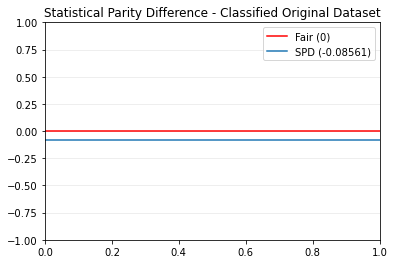

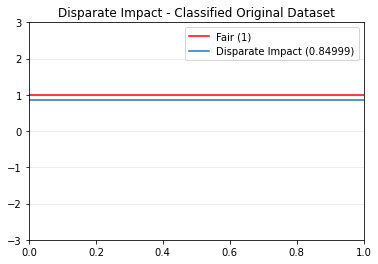

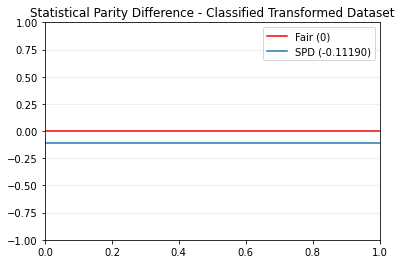

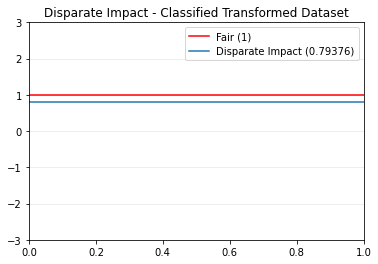

In [20]:

def STEP4():
    raw_df = pd.read_csv(r"dataset/student-por.csv", delimiter=',')
    df = raw_df.replace({'sex': {'M': 0, 'F': 1}})

    df_num_rows = int(len(df))

    # split data into train and test sets
    shuffled = df.sample(frac=1)
    df_train = shuffled.iloc[:int(df_num_rows / 2)]
    df_test = shuffled.iloc[int(df_num_rows / 2):]

    # classify data Y in this case is G3. Features are G1 and G2,

    features = ['sex', 'G1', 'G2']
    y_feature = 'G3'

    # create training data
    df_train_x = df_train[features]
    df_train_y = df_train[y_feature]

    # create and train classifier
    orig_classifier = DecisionTreeClassifier()
    orig_classifier.fit(df_train_x, df_train_y)

    # run classifier against the test set
    df_test_x = df_test[features]
    predicted = orig_classifier.predict(df_test_x)

    df_test_x['G3_Predicted'] = predicted
    df_test_x['G3_Actual'] = df_test[y_feature]

    # create a classifier for the data from Step 3.3
    weighted_raw_df = pd.read_csv(r"out/weighted.csv", delimiter=',')
    weighted_df = weighted_raw_df.replace({'sex': {'Male': 0, 'Female': 1}})

    weighted_df_num_rows = int(len(weighted_df))

    # split data into train and test sets
    weighted_shuffled = weighted_df.sample(frac=1)
    weighted_df_train = weighted_shuffled.iloc[:int(weighted_df_num_rows / 2)]
    weighted_df_test = weighted_shuffled.iloc[int(weighted_df_num_rows / 2):]

    # create training data
    features = ['sex', 'G1_Weighted', 'G2_Weighted']
    y_feature = 'G3'
    weighted_df_train_x = weighted_df_train[features]
    weighted_df_train_y = weighted_df_train[y_feature]

    # create and train classifier
    weighted_classifier = DecisionTreeClassifier()
    weighted_classifier.fit(weighted_df_train_x, weighted_df_train_y)

    # run classifier against the test set
    weighted_df_test_x = weighted_df_test[features]
    weighted_predicted = weighted_classifier.predict(weighted_df_test_x)

    weighted_df_test_x['G3_Predicted'] = weighted_predicted
    weighted_df_test_x['G3_Actual'] = weighted_df_test[y_feature]

    df_test_x.to_csv('out/predicted_g3-unweighted.csv', index=False)
    weighted_df_test_x.to_csv('out/predicted_g3-weighted.csv', index=False)

    # calculate fairness based on sex
    up_sex = 0  # male
    p_sex = 1  # female
    bins = [0, 11, 19]
    labels = [0, 1]

    # calculate fairness for original dataset
    df_test_x['G3_Predicted_Discrete'] = pd.cut(df_test_x['G3_Predicted'], bins=bins, labels=labels,
                                                include_lowest=True)
    sex_g3_freq_og = df_test_x.groupby(['sex', 'G3_Predicted_Discrete']).size()

    # statistical parity difference G3 and sex
    spd_g3_sex_og = (sex_g3_freq_og[up_sex][1] / (sex_g3_freq_og[up_sex][1] + sex_g3_freq_og[up_sex][0])) - (
            sex_g3_freq_og[p_sex][1] / (sex_g3_freq_og[p_sex][1] + sex_g3_freq_og[p_sex][0]))

    # disparate impact G3 and sex
    di_g3_sex_og = (sex_g3_freq_og[up_sex][1] / (sex_g3_freq_og[up_sex][1] + sex_g3_freq_og[up_sex][0])) / (
            sex_g3_freq_og[p_sex][1] / (sex_g3_freq_og[p_sex][1] + sex_g3_freq_og[p_sex][0]))

    # calculate fairness for transformed dataset
    weighted_df_test_x['G3_Predicted_Discrete'] = pd.cut(weighted_df_test_x['G3_Predicted'], bins=bins, labels=labels,
                                                         include_lowest=True)
    sex_g3_freq_transformed = weighted_df_test_x.groupby(['sex', 'G3_Predicted_Discrete']).size()

    # spd of weighted for weighted dataset
    spd_g3_sex_transformed = (sex_g3_freq_transformed[up_sex][1] / (
            sex_g3_freq_transformed[up_sex][1] + sex_g3_freq_transformed[up_sex][0])) - (
                                     sex_g3_freq_transformed[p_sex][1] / (
                                     sex_g3_freq_transformed[p_sex][1] + sex_g3_freq_transformed[p_sex][0]))

    # disparate impact G3 and sex for weighted dataset
    di_g3_sex_transformed = (sex_g3_freq_transformed[up_sex][1] / (
            sex_g3_freq_transformed[up_sex][1] + sex_g3_freq_transformed[up_sex][0])) / (
                                    sex_g3_freq_transformed[p_sex][1] / (
                                    sex_g3_freq_transformed[p_sex][1] + sex_g3_freq_transformed[p_sex][0]))
    print("SPD original: {}".format(spd_g3_sex_og))
    print("DI original: {}".format(di_g3_sex_og))

    print("SPD weighted: {}".format(spd_g3_sex_transformed))
    print("DI weighted: {}".format(di_g3_sex_transformed))

    outcomes = pd.DataFrame(columns=['Independent Variable', 'Metric', 'Original', 'Transformed', 'Difference'])
    outcomes.loc[len(outcomes)] = ['Sex', 'Statistical Parity Difference', spd_g3_sex_og, spd_g3_sex_transformed,
                                   spd_g3_sex_og - spd_g3_sex_transformed]
    outcomes.loc[len(outcomes)] = ['Sex', 'Disparate Impact', di_g3_sex_og, di_g3_sex_transformed,
                                   di_g3_sex_og - di_g3_sex_transformed]

    outcomes.to_csv('out/fairness_metrics_classified.csv', index=False)

    # Plots for step 5 #TODO Make these pretty
    plt.clf()
    plt.axhline(y=0, color='r', label='Fair (0)')
    plt.axhline(spd_g3_sex_og, label="SPD ({:.5f})".format(spd_g3_sex_og))
    plt.grid(True, axis='y', alpha=0.2, color='#999999')
    plt.title("Statistical Parity Difference - Classified Original Dataset")
    top = math.ceil(abs(spd_g3_sex_og) + .3)
    plt.ylim(-top, top)
    plt.savefig('out/spd_g3_sex_og.png', bbox_inches='tight')
    plt.legend()
    plt.show()

    plt.clf()
    plt.axhline(y=1, color='r', label='Fair (1)')
    plt.axhline(di_g3_sex_og, label="Disparate Impact ({:.5f})".format(di_g3_sex_og))
    plt.grid(True, axis='y', alpha=0.2, color='#999999')
    plt.title("Disparate Impact - Classified Original Dataset")
    top = math.ceil(abs(di_g3_sex_og) + .3 + 1)
    plt.ylim(-top, top)
    plt.legend()
    plt.savefig('out/di_g3_sex_og.png', bbox_inches='tight')
    plt.show()

    plt.clf()
    plt.axhline(y=0, color='r', label='Fair (0)')
    plt.axhline(spd_g3_sex_transformed, label="SPD ({:.5f})".format(spd_g3_sex_transformed))
    plt.grid(True, axis='y', alpha=0.2, color='#999999')
    plt.title("Statistical Parity Difference - Classified Transformed Dataset")
    top = math.ceil(abs(spd_g3_sex_transformed) + .3)
    plt.ylim(-top, top)
    plt.legend()
    plt.savefig('out/spd_g3_sex_transformed.png', bbox_inches='tight')
    plt.show()

    plt.clf()
    plt.axhline(y=1, color='r', label='Fair (1)')
    plt.axhline(di_g3_sex_transformed, label="Disparate Impact ({:.5f})".format(di_g3_sex_transformed))
    plt.grid(True, axis='y', alpha=0.2, color='#999999')
    plt.title("Disparate Impact - Classified Transformed Dataset")
    top = math.ceil(abs(di_g3_sex_transformed) + .3 + 1)
    plt.ylim(-top, top)
    plt.legend()
    plt.savefig('out/di_g3_sex_transformed.png', bbox_inches='tight')
    plt.show()

STEP4()

# Step 5:


### Team Members:
- Alex Carmona
- Sarah Hernandez
- Neesha Sinha
- Yaima Valdivia


### Questions, Answered:


1) Explain which fairness metric (if any) is best and provide a justification for your answer:

Both the Statistical Parity Difference and the Disparate Impact metrics, used here, successfully mitigated bias in our dataset, and both are used in industry to mitigate bias on a grander scale. The difference between these two measures is subtle. The Statistical Parity Difference measures the statistical difference in outcomes between privileged and underprivileged groups, while the disparate impact measures the ratio of outcomes. While both serve useful functions, ultimately, I would pick the disparate impact measurement because it is 1) easier to explain and 2) easier for the less statistical-minded to visualize. Because communication is key in any industry, I would pick the more communicable metric over the lesser ones.

### Individual Responses:

**Alex Carmona:**
 
**Did any of these approaches seem to work to mitigate bias (or increase fairness)? Explain your reasoning.**<br>
Yes, after applying the reweighting strategy, the bias seemed to be mitigated. Both SPD and DI were moved closer towards being fair. <br>
 
**Did any group receive a positive advantage?**<br>
Yes. The weights provided an advantage towards unprivileged groups. <br>
**Was any group disadvantaged by these approaches?** <br>
No. These improvements helped provide a positive outcome for unprivileged groups without making an impact on privileged groups.<br>
**What issues would arise if you used these methods to mitigate bias?**<br>
While using the weighted values to mitigate bias provides a “prettier” picture, it does not necessarily reflect reality. Additionally, the algorithm we used to create the weights is very rudimentary and would need to be revisited if we were to expand the data set. <br>
 
**Sarah Hernandez:**
 
**Did any of these approaches seem to work to mitigate bias (or increase fairness)? Explain your reasoning.**<br>
Yes! Our reweighting strategy proved to be most effective. For both our metrics, Statistical Parity Difference and Disparate Impact, reweighting brought their values to their statistical ideal (0 and 1, respectively!).<br>
**Did any group receive a positive advantage?**<br>
Yes! Reweighting resulted in a more fair distribution of outcomes, resulting in a positive advantage for our underprivileged groups.<br>
**Was any group disadvantaged by these approaches?** <br>
For this particular reweighting, no group was disadvantaged by the result.<br>
**What issues would arise if you used these methods to mitigate bias?**<br>
For one, applying our reweighting algorithm to another set would not prove useful, as it is specifically designed for this dataset alone. Additionally, while our reweighting method only serves to increase fairness across multiple metrics, the broader public may not see it as such and could result in public outcry.<br>
 
**Neesha Sinha:**
 
**Did any of these approaches seem to work to mitigate bias (or increase fairness)? Explain your reasoning.**<br>
Reweighting strategies did work to mitigate bias. After applying different weights to each population, the fairness metrics we considered (SPD and DI) both changed to match the fair threshold (SPD = 0 and DI = 1). <br>
**Did any group receive a positive advantage?**<br>
Since the reweighting technique used different weights for each dependent variable and protected class variable combination, each of the six groups would be deemed “fair” once the appropriate weights were applied. <br>
**Was any group disadvantaged by these approaches?** <br>
Similar to the above answer, since we used different weights for each combination, each group was fair, and no one was disadvantaged since each combination was weighed separately. <br>
**What issues would arise if you used these methods to mitigate bias?**<br>
If we use reweighting to mitigate bias, it results in an inaccurate representation of the actual data. Since different populations would be weighed differently, we’re essentially changing the data set to portray the populations on an equal footing.
<br>
 
**Yaima Valdivia:**


**Did any of these approaches seem to work to mitigate bias (or increase fairness)? Explain your reasoning.**<br>
Reweighting did work to mitigate bias. The fairness metrics used achieved the fair threshold (Statistical Parity Difference = 0, Disparate Impact = 1) after the approach. <br>
**Did any group receive a positive advantage?**<br>
Both groups received a positive benefit after applying the custom reweighting techniques. <br>
**Was any group disadvantaged by these approaches?**<br> 
There was no introduced disadvantage after reweighting the sets. <br>
**What issues would arise if you used these methods to mitigate bias?**<br>
The reweighting technique is ideal when we cannot change the values.  Because the approach was customized to match the existing dataset, the same method could introduce biases in anything different. <br>

